Purpose: Determine which machine learning model (decision tree or random forest) performs better in predicting the occurence of diabetes. 

This data set was gathered from kaggle and that was sourced from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Importing data from diabetes data from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)

In [2]:
df = pd.read_csv('healthcarediabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Taking a look at the head and tail of the data to become familiar with the data we're working with 

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Saving the columns into a list so it'll be easier to perform transformations on any given column 

In [6]:
columns = list(df.columns)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Performing some EDA to understand the data we're working with 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df[df['Outcome']==1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [10]:
df[df['Outcome']==0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


Taking a look at the duplicates

In [11]:
df.duplicated().sum()

0

Looks like there are no duplicates in the data

Taking a looking at the null values

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looks like there are no null values in this data, but the variables glucose, blood pressure, skin thickness, insulin, and BMI shouldn't have values of 0. If there are 0s in those columns, those are null values

Taking a look at how the data looks for those with diabetes and those without diabetes to see if there are obvious trends 

In [13]:
df[df['Outcome']==1].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [14]:
df[df['Outcome']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


Just from the first few lines of the glucose and diabetes pedigree function fields I can already see those with diabetes have higher glucose levels 
Pregnancies, blood pressure, skin thickness, BMI, and age don't seem to have too much of an affect on the outcome of diabetes
I can't tell too much from insulin

Looking at boxplot for the fields to understand the data a little better visually 

<AxesSubplot:>

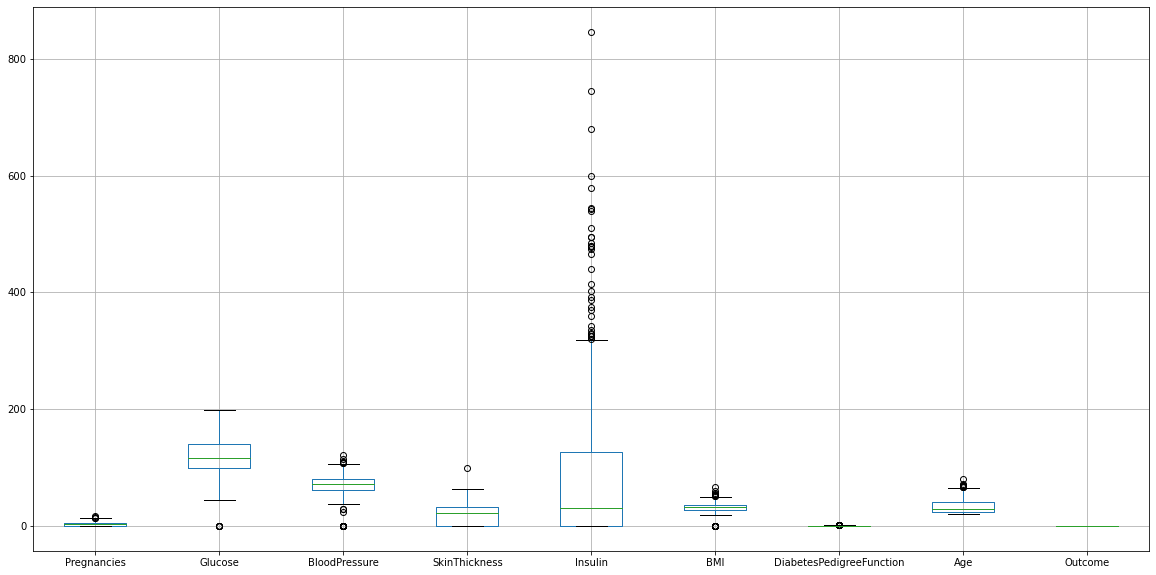

In [15]:
df.boxplot(figsize=(20,10))

Insulin has quite a few outliers, the other fields are not concerning

Correlation matrix and plot to understand which variables are correlated and to understand which is the most correlated to the target variable outcome

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

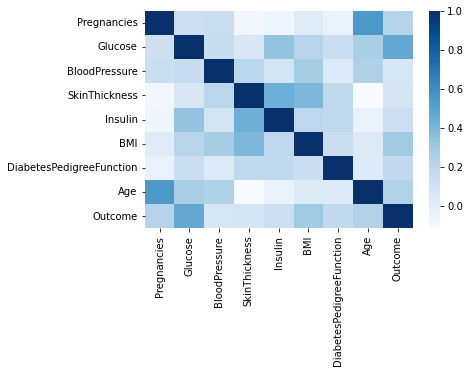

In [17]:
sns.heatmap(df.corr(), cmap="Blues")

From the heatmap, it looks like glucose has the greatest relationship with the occurence of diabetes, followed by BMI, age, and pregnancies but those relationships are quite small 

Taking a look at the distribution of the data for each of the fields 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

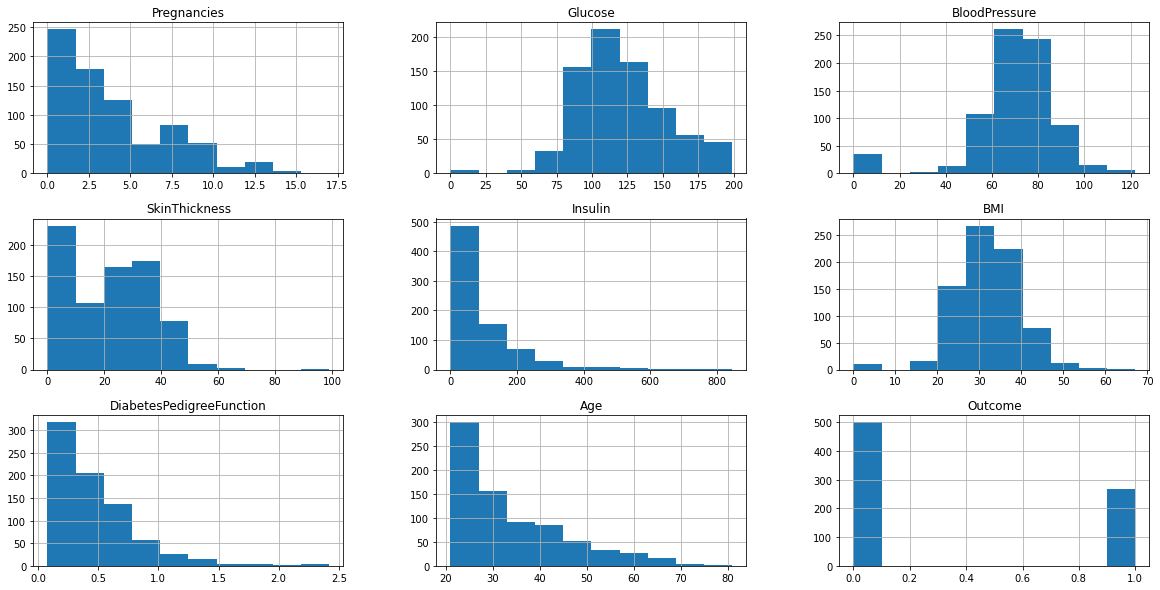

In [18]:
df.hist(figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

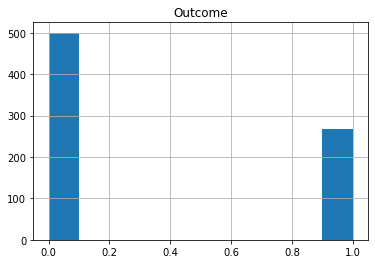

In [19]:
df.hist('Outcome')

From the hisotgram, there are are more people in this data set that don't have diabetes than those who do

Glucose, blood pressure, and BMI are all normally distributed
Blood pressure, BMI, DiabetesPedigreeFunction, and Age are right skewed. Once dealing with the "missing" values, curious to see how the distribution for these fields will look

In [20]:
df['Glucose'].replace({0: None}, inplace = True)

In [21]:
df['BloodPressure'].replace({0: None}, inplace = True)

In [22]:
df['SkinThickness'].replace({0: None}, inplace = True)

In [23]:
df['Insulin'].replace({0: None}, inplace = True)

In [24]:
df['BMI'].replace({0: None}, inplace = True)

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,None,33.6,0.627,50,1
1,1,85,66,29,None,26.6,0.351,31,0
2,8,183,64,None,None,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The data is now truly accounting for missing values for the glucose, blood pressure, skin thickness, insulin, and BMI fields

Now looking at the count of null values in the data

In [26]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
df.shape

(768, 9)

Looking into how to handle the missing data. I'm assuming the data is missing at random (Keita, Z. (2023, January). Top Techniques to Handle Missing Values Every Data Scientist Should Know. Datacamp. Retrieved September 23, 2023, from https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values) because certain collection of data is usually coincidentally missed in healthcare from past experience such as forgetting to taking someone's weight which means BMI can't be calcuted. Since there is the assumption of the data missing at random, I'll use multiple imputation to handle the missing values in the data 

Using a mice forest algorithm to deal with this missing values - "uses multiple iterations of machine learning model training to predict the missing values by using the known values from the other features in the data as predictors" (Prabhakaran, S. (n.d.). MICE imputation – How to predict missing values using machine learning in Python. Machine Learning +. Retrieved September 23, 2023, from https://www.machinelearningplus.com/machine-learning/mice-imputation/)

In [28]:
!pip install miceforest

In [29]:
import miceforest as mf
from miceforest import ImputationKernel

In [30]:
df_train = df.loc[:, ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]

In [31]:
df_train = df

In [32]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,None,33.6,0.627,50,1
1,1,85,66,29,None,26.6,0.351,31,0
2,8,183,64,None,None,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df_train = df_train.infer_objects()

In [34]:
# Create kernel. 
kds = mf.ImputationKernel(
  df_train,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
df_imputed = kds.complete_data()

In [35]:
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,130.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,37.0,26.6,0.351,31,0
2,8,183.0,64.0,21.0,120.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Adding 5 more iterations for the model and getting more predictions

In [36]:
kds.mice(iterations=5, n_estimators=50)

In [37]:
df_imputed2 = kds.complete_data()
df_imputed2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,70.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,49.0,26.6,0.351,31,0
2,8,183.0,64.0,17.0,249.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [38]:
df_imputed2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Looking at the numerical counts for the outcome of diabetes to see the count distribution 

In [40]:
df_imputed2['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Because of an uneven distribution of the outcome for whether someone has diabetes or not, generate new samples using synthetic minority oversampling technique (SMOTE)- doesn't duplicate data, and generates new samples by interpolation
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#h-smote-synthetic-minority-oversampling-technique

In [41]:
X = df_imputed2.drop("Outcome", axis = 1)
y = df_imputed2["Outcome"]

In [42]:
X.shape, y.shape

((768, 8), (768,))

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
X_resample, y_resample = SMOTE(random_state=108).fit_resample(X,y)

In [45]:
X_resample.shape, y_resample.shape

((1000, 8), (1000,))

In [46]:
y_resample.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [47]:
df_final = pd.concat([X_resample,y_resample],axis = 1)

In [48]:
df_final.shape

(1000, 9)

array([[<AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

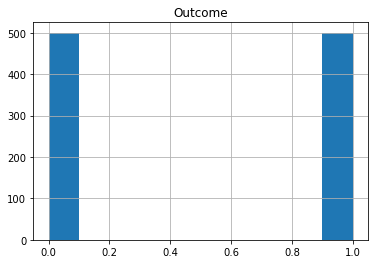

In [49]:
df_final.hist("Outcome")

Now we're working with an even distribution of the outcome variable 

Looking at the heatmap again for the fields that are the most related to the outcome and it doesn't look much different from the initial one 

<AxesSubplot:>

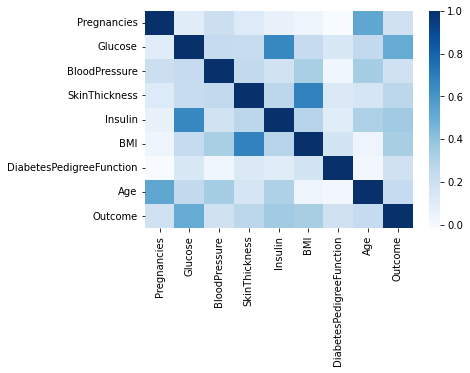

In [50]:
sns.heatmap(df_final.corr(), cmap="Blues")

Now that we've cleaned the data from missing values and have an even distribution of the outcome values, start building the machine learning model to predict diabetes 

Splitting the data between a train and test data sets

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
features = df_final.drop('Outcome', axis = 1)
targets = df_final['Outcome']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify = targets, random_state = 42)

Starting with a decision tree

In [53]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.788


From the decision tree, I can see the train set is perfect with 100% accuracy but the test set is much lower at 79.9% accuracy. This is a sign of overfitting  

Seeing what the depth of the tree is 

In [55]:
dt.get_depth()

19

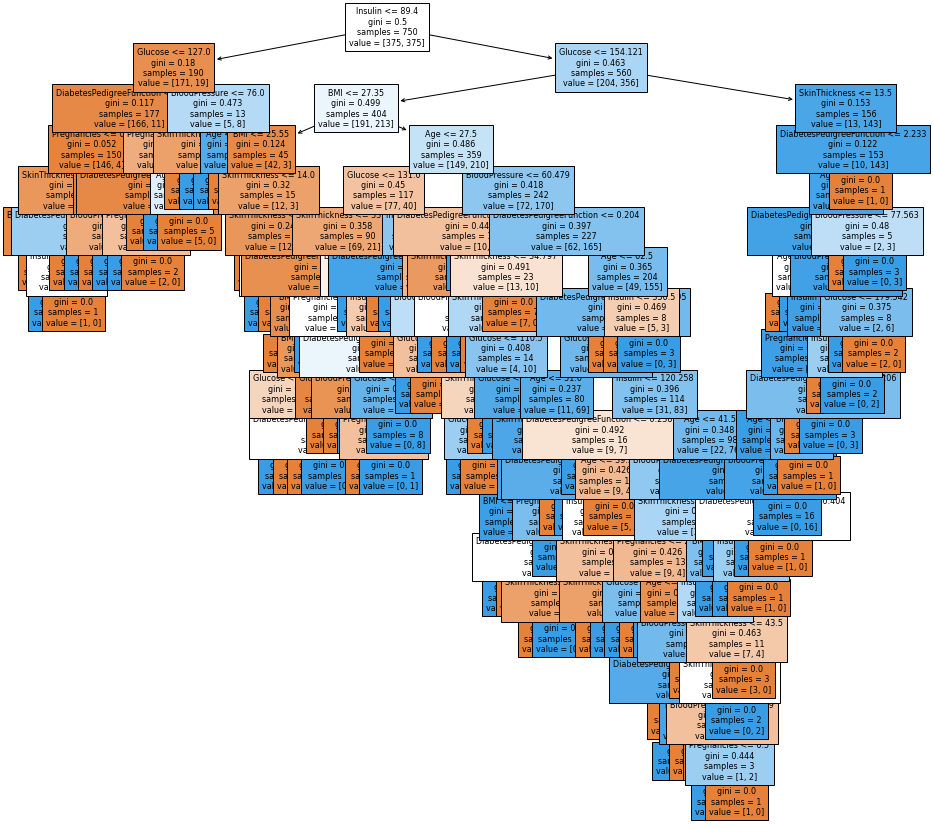

In [56]:
f = plt.figure(figsize=(15, 15))
_ = plot_tree(dt, fontsize=8, feature_names=features.columns, filled=True)

Since a greater depth can lead to overfitting, I'll decrease the depth of the decision tree 

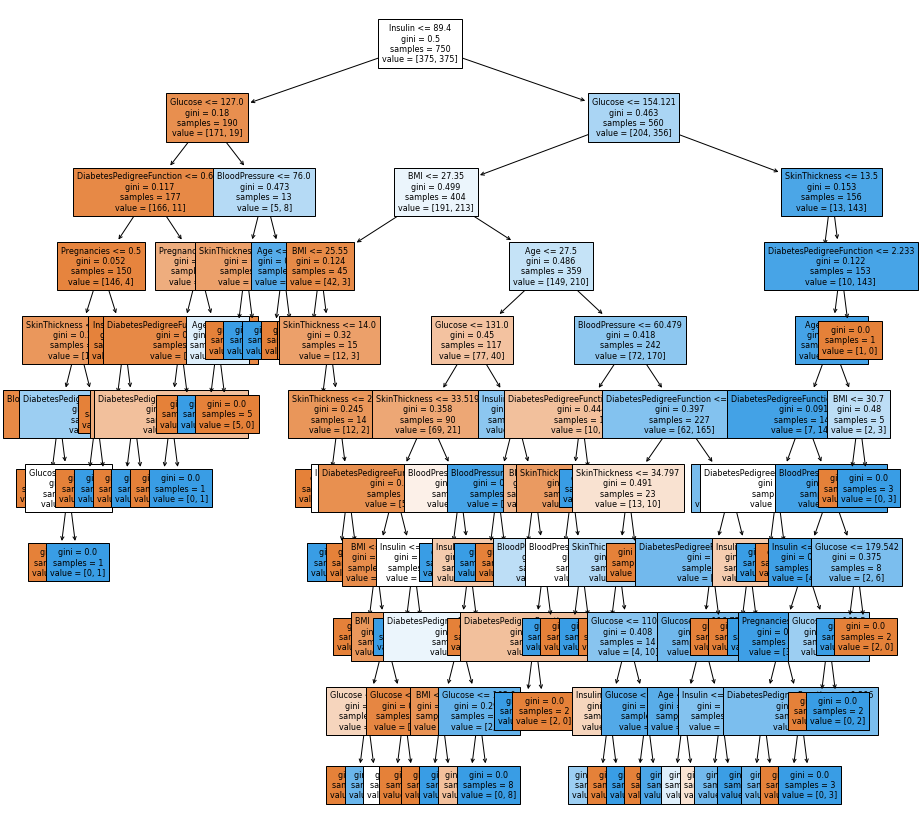

In [57]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train)

f = plt.figure(figsize=(15, 15))
_ = plot_tree(dt, fontsize=8, feature_names=features.columns, filled=True)

In [58]:
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9386666666666666
0.792


Decreasing the depth, improved the decision tree a bit and the decision tree looks much better

Looking at a random forest now to see if the accuracy is better

In [59]:
rfc1 = RandomForestClassifier(random_state=42)
rfc1.fit(x_train, y_train)

print(rfc1.score(x_train, y_train))
print(rfc1.score(x_test, y_test))

1.0
0.828


Looks like there's some overfitting, reduce the max depth to improve this 

In [60]:
rfc2 = RandomForestClassifier(max_depth=5, random_state=42)
rfc2.fit(x_train, y_train)

print(rfc2.score(x_train, y_train))
print(rfc2.score(x_test, y_test))

0.868
0.78


In [61]:
rfc3 = RandomForestClassifier(max_depth=2, random_state=42)
rfc3.fit(x_train, y_train)

print(rfc3.score(x_train, y_train))
print(rfc3.score(x_test, y_test))

0.8186666666666667
0.776


The performance of the random forest model was best with no adjustments so will stick with the original model 

Performing feature selection to determine the important features and see if removing the non important ones could improve the model 

<AxesSubplot:title={'center':'Feature Importance'}>

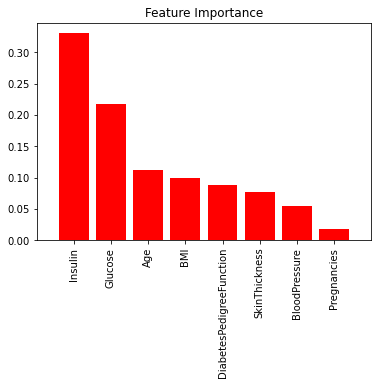

In [62]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(dt, feature_names=features.columns, x_tick_rotation=90)

All variables in the decision tree model look to have some importance to the outcome 

<AxesSubplot:title={'center':'Feature Importance'}>

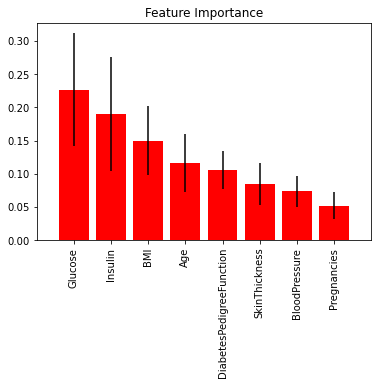

In [63]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc1, feature_names=features.columns, x_tick_rotation=90)

The random forest model also looks to have variables that are all important to the outcome 

In [64]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9386666666666666
0.796


In [65]:
rfc1 = RandomForestClassifier(random_state=42)
rfc1.fit(x_train, y_train)

print(rfc1.score(x_train, y_train))
print(rfc1.score(x_test, y_test))

1.0
0.828


Using a confusion matrix to evaluate the accuracy of the model 

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

In [68]:
confusion_matrix(y_test, dt.predict(x_test))

array([[ 98,  27],
       [ 24, 101]])

In [69]:
confusion_matrix(y_test, rfc1.predict(x_test))

array([[101,  24],
       [ 19, 106]])

Looking at an AUC curve to evaluate accuracy

AUC: 0.7858239999999999


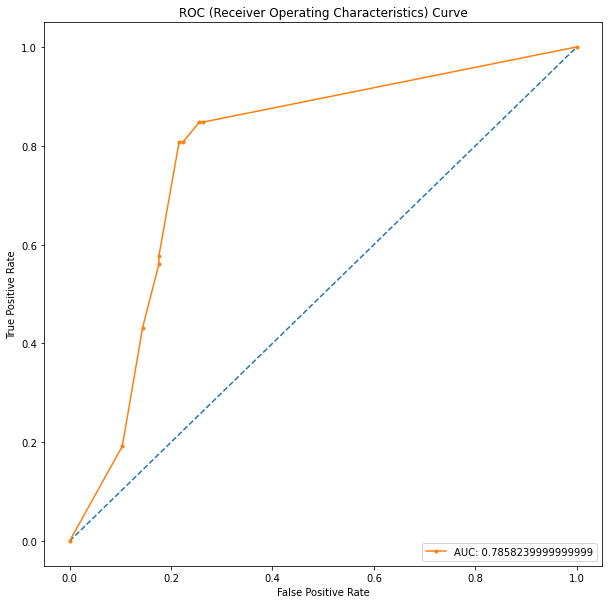

In [70]:
prob_dt = dt.predict_proba(x_test)
prob_dt = prob_dt[:, 1]
auc_dt = roc_auc_score(y_test, prob_dt)
print(f"AUC: {auc_dt}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_dt)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_dt}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

AUC: 0.886432


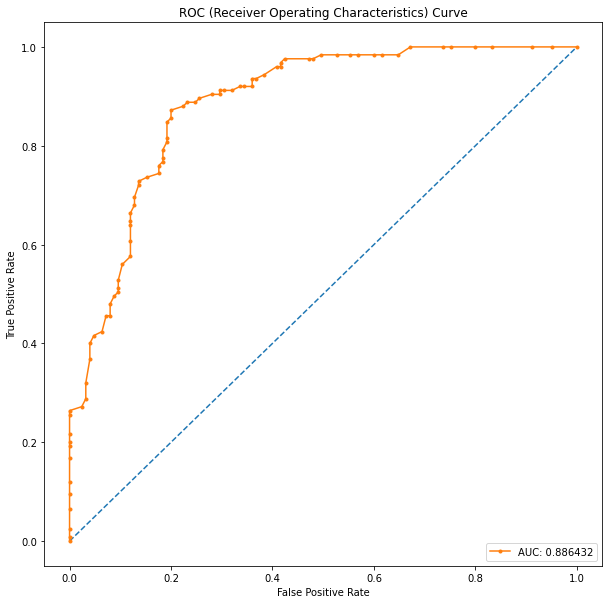

In [72]:
prob_rf = rfc1.predict_proba(x_test)
prob_rf = prob_rf[:, 1]
auc_rf = roc_auc_score(y_test, prob_rf)
print(f"AUC: {auc_rf}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_rf)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_rf}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

In [74]:
from sklearn.metrics import classification_report

In [75]:
report = classification_report(y_test,dt.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       125
           1       0.79      0.81      0.80       125

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



In [76]:
report = classification_report(y_test,rfc1.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       125
           1       0.82      0.85      0.83       125

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



Conclusions: The random forest model performed the best and this was confirmed with evaluating using both a confusion matrix and AUC curve

References:

Chugh, V. (2022, October 4). Which Metric Should I Use? Accuracy vs. AUC. KD Nuggets. https://www.kdnuggets.com/2022/10/metric-accuracy-auc.html

Healthcare Costs For Americans Projected to Grow at an Alarmingly High Rate. (2019, May 1). Peter G. Peterson Foundation. https://www.pgpf.org/blog/2019/05/healthcare-costs-for-americans-projected-to-grow-at-an-alarmingly-high-rate
 
Prabhakaran, S. (n.d.). MICE imputation – How to predict missing values using machine learning in Python. Machine Learning +. https://www.machinelearningplus.com/machine-learning/mice-imputation/
 
Risk Factors for Type 2 Diabetes (2022, July). National Institute of Diabetes and Digestive and Kidney Diseases. https://www.niddk.nih.gov/health-information/diabetes/overview/risk-factors-type-2-diabetes
 
R, S. E. (2023, July 5). Understand Random Forest Algorithms With Examples. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
 
Saini, A. (2023, September 13). Decision Tree Algorithm – A Complete Guide. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
 
Satpathy, S. (2023, July 24). SMOTE for Imbalanced Classification with Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#h-smote-synthetic-minority-oversampling-technique

Schneider, E. C., Shah, A., Doty, M. M., Tikkanen, R., Fields, K., Williams II, R. D. (2021, August 4). Health Care in the U.S. Compared to Other High-Income Countries. The Commonwealth Fund. https://www.commonwealthfund.org/publications/fund-reports/2021/aug/mirror-mirror-2021-reflecting-poorly?utm_source=google&utm_medium=cpc&utm_campaign=Mirror_Mirror_-_Universal_Coverage&utm_adgroup=Mi
Top Techniques to Handle Missing Values Every Data Scientist Should Know. (2023, January). Datacamp. https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

Verma, D. (n.d.). Diabetes Healthcare: Comprehensive Dataset-AI. Kaggle. https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset